In [118]:
from src.dataloader import *

from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
import torch.nn as nn


import tensorflow as tf
import keras
import keras.layers as layers
from keras.losses import BinaryCrossentropy


In [119]:
tf.random.set_seed(42)

# Import des données

In [120]:
label_attribution=LabelAttribution(path_image_google="C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/", 
                                   path_mask_google='C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/mask/',
                                   path_metadata='C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/metadata.csv',
                                   colonne_identifiant='identifiant',
                                   path_export_train_test="C:/Users/yanis/OneDrive/Documents/Projet Stat/statapps",
                                   path_image_ign='C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/ign/img',
                                   path_mask_ign='C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/ign/mask/',
                                   use_img_google=True,
                                   use_img_ign=False
                                    )

In [121]:
label_attribution.run()

Le LeNET5 a été conçu pour prendre en entrée des images de dimension 28*28. On passe donc les images 400 x 400 en 28 x 28. On convertit ensuite ces dernières en tenseurs. 

In [122]:
path_train="C:/Users/yanis/OneDrive/Documents/Projet Stat/statapps/train_data.csv"
path_test="C:/Users/yanis/OneDrive/Documents/Projet Stat/statapps/test_data.csv"

transformed_train_dataset  = CustomImageDataset(path_train,"C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/", transform=transforms.Compose([
                                               transforms.Resize(28),
                                               transforms.ToTensor(),
                                           ]))
transformed_test_dataset = CustomImageDataset(path_test,"C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/",
                                            transform=transforms.Compose([
                                               transforms.Resize(28),
                                               transforms.ToTensor(),
                                           ]))

In [123]:
print("Nombre d'images dans le train: {}".format(transformed_train_dataset.__len__()))
print("Nombre d'images dans le test: {}".format(transformed_test_dataset.__len__()))

Nombre d'images dans le train: 23045
Nombre d'images dans le test: 5762


In [124]:
train_dataloader = DataLoader(transformed_train_dataset, batch_size=23045, shuffle=True)
test_dataloader = DataLoader(transformed_test_dataset, batch_size=5762, shuffle=True)

# LeNet5: implémentation et apprentissage

## Absence de data augmentations

On entraîne le LeNet5 sans data augmentations. Nous fixons les hyper-paramètres de façon arbitraire dans un premier temps:
* Learning rate: 0,01
* Dropout: 0,2
* epochs: 10
* batch size: 32

In [125]:
X_train, Y_train=next(iter(train_dataloader))
X_test, Y_test=next(iter(test_dataloader))

X_train_permute=X_train.permute(0, 2, 3,1)
X_test_permute=X_test.permute(0, 2, 3,1)

In [126]:
from src.lenet5 import buildModel

model_init=buildModel()

history=model_init.fit(x=X_train_permute.numpy(), y=Y_train.numpy(),
	validation_data=(X_test_permute.numpy(), Y_test.numpy()),
	batch_size=32,
	epochs=10)

Epoch 1/10
721/721 [==============================] - 5s 6ms/step - loss: 0.6206 - Accuracy: 0.6711 - recall_m: 0.8014 - precision_m: 0.6721 - f1_m: 0.7133 - val_loss: 0.6111 - val_Accuracy: 0.6786 - val_recall_m: 0.4918 - val_precision_m: 0.8421 - val_f1_m: 0.6131
Epoch 2/10
721/721 [==============================] - 4s 6ms/step - loss: 0.5539 - Accuracy: 0.7320 - recall_m: 0.7583 - precision_m: 0.7447 - f1_m: 0.7424 - val_loss: 0.5249 - val_Accuracy: 0.7551 - val_recall_m: 0.7623 - val_precision_m: 0.7818 - val_f1_m: 0.7671
Epoch 3/10
721/721 [==============================] - 4s 6ms/step - loss: 0.5058 - Accuracy: 0.7683 - recall_m: 0.7914 - precision_m: 0.7789 - f1_m: 0.7776 - val_loss: 0.4657 - val_Accuracy: 0.8004 - val_recall_m: 0.8440 - val_precision_m: 0.8012 - val_f1_m: 0.8182
Epoch 4/10
721/721 [==============================] - 4s 6ms/step - loss: 0.4585 - Accuracy: 0.8051 - recall_m: 0.8275 - precision_m: 0.8112 - f1_m: 0.8136 - val_loss: 0.4890 - val_Accuracy: 0.7595 - va

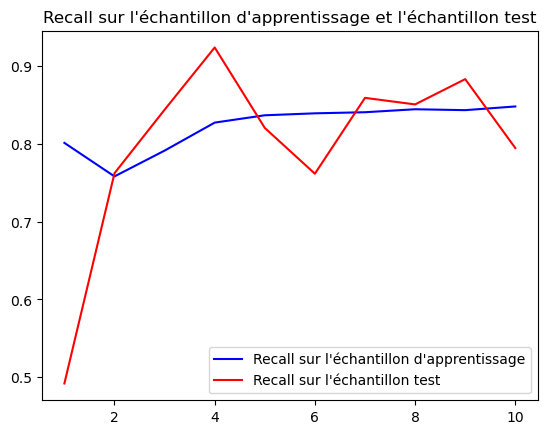

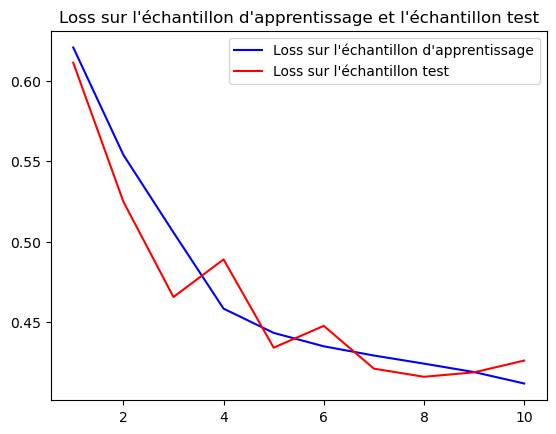

In [127]:
recall = history.history['recall_m']
val_recall = history.history['val_recall_m']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(recall) + 1)

plt.plot(epochs, recall, 'b', label="Recall sur l'échantillon d'apprentissage")
plt.plot(epochs, val_recall, 'b', label="Recall sur l'échantillon test", color="red")
plt.title("Recall sur l'échantillon d'apprentissage et l'échantillon test")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label="Loss sur l'échantillon d'apprentissage")
plt.plot(epochs, val_loss, 'b', label="Loss sur l'échantillon test", color="red")
plt.title("Loss sur l'échantillon d'apprentissage et l'échantillon test")
plt.legend()
plt.show()

In [128]:
loss, accuracy, recall, precision, f1score = model_init.evaluate(X_test_permute.numpy(), Y_test.numpy(), verbose=0)
print("Loss sur l'échantillon test: {}".format(round(loss,3)))
print("Accuracy sur l'échantillon test: {}".format(round(accuracy,3)))
print("Recall sur l'échantillon test: {}".format(round(recall,3)))
print("Precision sur l'échantillon test: {}".format(round(precision,3)))
print("F1-score sur l'échantillon test: {}".format(round(f1score,3)))

Loss sur l'échantillon test: 0.426
Accuracy sur l'échantillon test: 0.828
Recall sur l'échantillon test: 0.795
Precision sur l'échantillon test: 0.878
F1-score sur l'échantillon test: 0.83


In [129]:
prob_predict = model_init.predict(X_test_permute.numpy())
y_pred = (np.squeeze(prob_predict) > 0.5).astype("int32")

181/181 [==============================] - 0s 2ms/step


In [130]:
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [131]:
unique, counts = np.unique(y_pred, return_counts=True)
res=dict(zip(unique, counts))
print("Nombre d'images prédites avec panneaux: {}".format(res[1]))
print("Nombre d'images prédites sans panneau: {}".format(res[0]))

Nombre d'images prédites avec panneaux: 2823
Nombre d'images prédites sans panneau: 2939


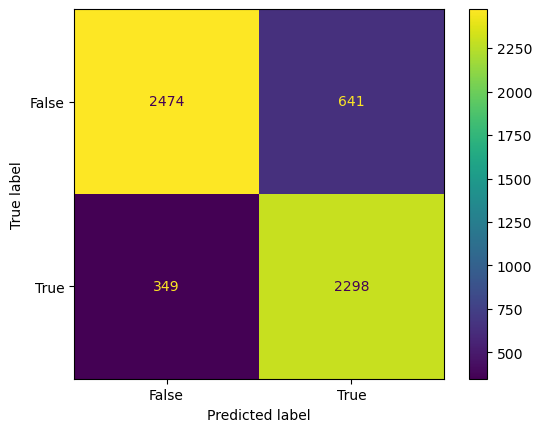

In [132]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

r = confusion_matrix(Y_test, y_pred)
r = np.flip(r)

cm_display = ConfusionMatrixDisplay(confusion_matrix = r, display_labels = [False, True])
cm_display.plot()
plt.show()

In [133]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

FPR, TPR, thresholds_keras = roc_curve(Y_test.numpy(), prob_predict)
AUC = auc(FPR, TPR)
print("AUC: {}".format(round(AUC, 2)))

AUC: 0.89


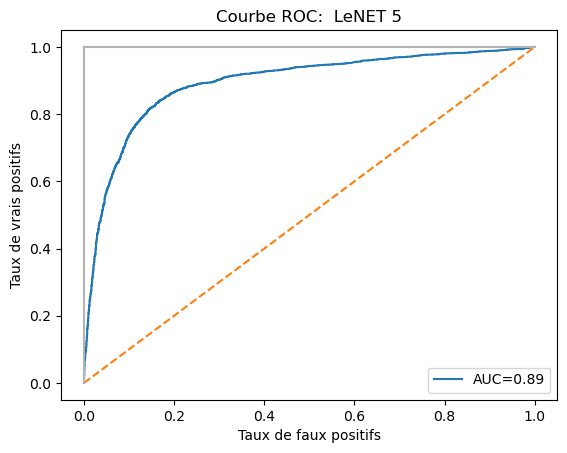

In [134]:
from matplotlib import pyplot as plt
# plot the roc curve for the model

plt.title('Courbe ROC:  LeNET 5')
plt.plot(FPR, TPR, label="AUC="+str(round(AUC,2)))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Taux de vrais positifs')
plt.xlabel('Taux de faux positifs')
plt.legend(loc=4)
plt.show()

## Ajout de data augmentations

In [135]:
transformed_train_dataset  = CustomImageDataset(path_train,"C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/", transform=transforms.Compose([
                                               transforms.Resize(28),
                                               transforms.ColorJitter(brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4), hue=(-0.5, 0.5)),
                                               transforms.RandomCrop(20),
                                               transforms.RandomHorizontalFlip(p=0.5),
                                               transforms.RandomVerticalFlip(p=0.5),
                                               transforms.RandomRotation(degrees = (0,180)),
                                               transforms.Resize(28),
                                               transforms.ToTensor(), 

                                           ]))

#On resize uniquement sur le test
transformed_test_dataset = CustomImageDataset(path_test,"C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/",
                                            transform=transforms.Compose([
                                               transforms.Resize(28),
                                               transforms.ToTensor(),
                                           ]))

In [136]:
train_dataloader = DataLoader(transformed_train_dataset, batch_size=23045, shuffle=True)
test_dataloader = DataLoader(transformed_test_dataset, batch_size=5762, shuffle=True)

On normalise les données d'apprentissage et de test

In [137]:
mean_train, std_train = mean_std(train_dataloader)
print("Moyenne par channel: {}".format(mean_train.tolist()))
print("Ecart-type par channel: {}".format(std_train.tolist()))

Moyenne par channel: [0.2967895269393921, 0.2967398762702942, 0.29646191000938416]
Ecart-type par channel: [0.19000914692878723, 0.1900046169757843, 0.1897313892841339]


In [138]:
mean_test, std_test = mean_std(test_dataloader)
print("Moyenne par channel: {}".format(mean_test.tolist()))
print("Ecart-type par channel: {}".format(std_test.tolist()))

Moyenne par channel: [0.34999269247055054, 0.3576663136482239, 0.3081057667732239]
Ecart-type par channel: [0.16761955618858337, 0.14885342121124268, 0.1473139077425003]


In [139]:
normalized_train_dataset  = CustomImageDataset(path_train,"C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/", transform=transforms.Compose([
                                               transforms.Resize(28),
                                               transforms.ColorJitter(brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4), hue=(-0.5, 0.5)),
                                               transforms.RandomCrop(20),
                                               transforms.RandomHorizontalFlip(p=0.5),
                                               transforms.RandomVerticalFlip(p=0.5),
                                               transforms.RandomRotation(degrees = (0,180)),
                                               transforms.Resize(28),
                                               transforms.ToTensor(),
                                               transforms.Normalize(mean = mean_train.tolist(),
                                                                    std= std_train.tolist()), 

                                           ]))


normalize_test_dataset = CustomImageDataset(path_test,"C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/",
                                            transform=transforms.Compose([
                                               transforms.Resize(28),
                                               transforms.ToTensor(),
                                               transforms.Normalize(mean = mean_test.tolist(),
                                                                    std= std_test.tolist()), 
                                           ]))
train_dataloader_augmente = DataLoader(normalized_train_dataset, batch_size=23045, shuffle=False)
test_dataloader_augmente = DataLoader(normalize_test_dataset, batch_size=23045, shuffle=False)

## Apprentissage avec data augmentations

In [140]:
X_train_augmente, Y_train_augmente=next(iter(train_dataloader_augmente))
X_test_augmente, Y_test_augmente=next(iter(test_dataloader_augmente))

X_train_augmente_permute=X_train_augmente.permute(0, 2, 3,1)
X_test_augmente_permute=X_test_augmente.permute(0, 2, 3,1)

In [141]:
model_augmente=buildModel()

history_augmente=model_augmente.fit(x=X_train_augmente_permute.numpy(), y=Y_train_augmente.numpy(),
	validation_data=(X_test_augmente_permute.numpy(), Y_test_augmente.numpy()),
	batch_size=32,
	epochs=10)

Epoch 1/10
721/721 [==============================] - 5s 6ms/step - loss: 0.6655 - Accuracy: 0.5970 - recall_m: 0.6936 - precision_m: 0.6046 - f1_m: 0.6391 - val_loss: 0.6384 - val_Accuracy: 0.6369 - val_recall_m: 0.6973 - val_precision_m: 0.6535 - val_f1_m: 0.6676
Epoch 2/10
721/721 [==============================] - 4s 6ms/step - loss: 0.6579 - Accuracy: 0.6004 - recall_m: 0.6841 - precision_m: 0.6113 - f1_m: 0.6381 - val_loss: 0.6371 - val_Accuracy: 0.6407 - val_recall_m: 0.7204 - val_precision_m: 0.6519 - val_f1_m: 0.6775
Epoch 3/10
721/721 [==============================] - 4s 6ms/step - loss: 0.6522 - Accuracy: 0.6117 - recall_m: 0.6846 - precision_m: 0.6221 - f1_m: 0.6451 - val_loss: 0.6336 - val_Accuracy: 0.6473 - val_recall_m: 0.7716 - val_precision_m: 0.6460 - val_f1_m: 0.6966
Epoch 4/10
721/721 [==============================] - 4s 6ms/step - loss: 0.6462 - Accuracy: 0.6225 - recall_m: 0.6845 - precision_m: 0.6309 - f1_m: 0.6496 - val_loss: 0.6253 - val_Accuracy: 0.6703 - va

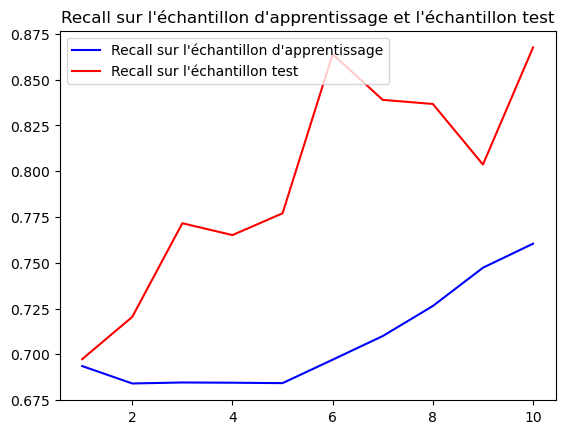

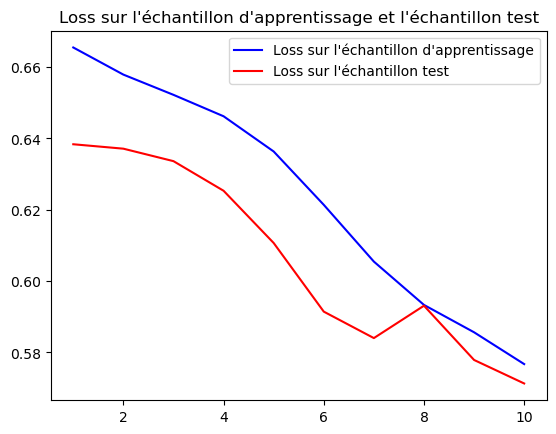

In [142]:
recall_augmente = history_augmente.history['recall_m']
val_recall_augmente = history_augmente.history['val_recall_m']
loss_augmente = history_augmente.history['loss']
val_loss_augmente = history_augmente.history['val_loss']
epochs_augmente = range(1, len(recall_augmente) + 1)

plt.plot(epochs_augmente, recall_augmente, 'b', label="Recall sur l'échantillon d'apprentissage")
plt.plot(epochs_augmente, val_recall_augmente, 'b', label="Recall sur l'échantillon test", color="red")
plt.title("Recall sur l'échantillon d'apprentissage et l'échantillon test")
plt.legend()
plt.figure()
plt.plot(epochs_augmente, loss_augmente, 'b', label="Loss sur l'échantillon d'apprentissage")
plt.plot(epochs_augmente, val_loss_augmente, 'b', label="Loss sur l'échantillon test", color="red")
plt.title("Loss sur l'échantillon d'apprentissage et l'échantillon test")
plt.legend()
plt.show()

In [143]:
loss_augmente, accuracy_augmente, recall_augmente, precision_augmente, f1score_augmente = model_augmente.evaluate(X_test_augmente_permute.numpy(), Y_test_augmente.numpy(), verbose=0)
print("Loss sur l'échantillon test: {}".format(round(loss_augmente,3)))
print("Accuracy sur l'échantillon test: {}".format(round(accuracy_augmente,3)))
print("Recall sur l'échantillon test: {}".format(round(recall_augmente,3)))
print("Precision sur l'échantillon test: {}".format(round(precision_augmente,3)))
print("F1-score sur l'échantillon test: {}".format(round(f1score_augmente,3)))

Loss sur l'échantillon test: 0.571
Accuracy sur l'échantillon test: 0.715
Recall sur l'échantillon test: 0.868
Precision sur l'échantillon test: 0.69
F1-score sur l'échantillon test: 0.763


In [144]:
prob_predict_augmente = model_augmente.predict(X_test_augmente_permute.numpy())
y_pred_augmente = (np.squeeze(prob_predict_augmente) > 0.5).astype("int32")

181/181 [==============================] - 0s 2ms/step


In [145]:
unique_augmente, counts_augmente = np.unique(y_pred_augmente, return_counts=True)
res_augmente=dict(zip(unique_augmente, counts_augmente))
print("Nombre d'images prédites avec panneaux: {}".format(res_augmente[1]))
print("Nombre d'images prédites sans panneau: {}".format(res_augmente[0]))

Nombre d'images prédites avec panneaux: 3932
Nombre d'images prédites sans panneau: 1830


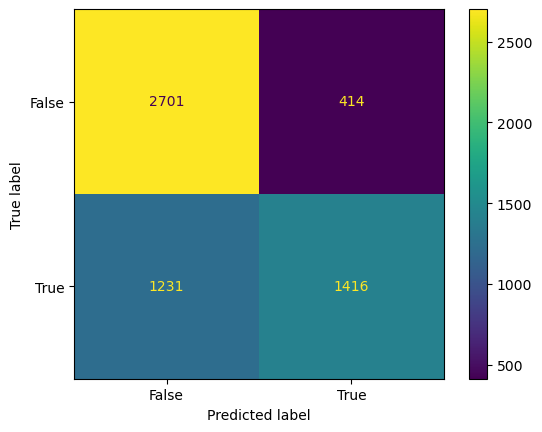

In [146]:
r = confusion_matrix(Y_test_augmente, y_pred_augmente)
r = np.flip(r)

cm_display = ConfusionMatrixDisplay(confusion_matrix = r, display_labels = [False, True])
cm_display.plot()
plt.show()

In [147]:
FPR_augmente, TPR_augmente, thresholds_keras_augmente = roc_curve(Y_test_augmente.numpy(), prob_predict_augmente)
AUC_augmente = auc(FPR_augmente, TPR_augmente)
print("AUC: {}".format(round(AUC_augmente, 2)))

AUC: 0.77


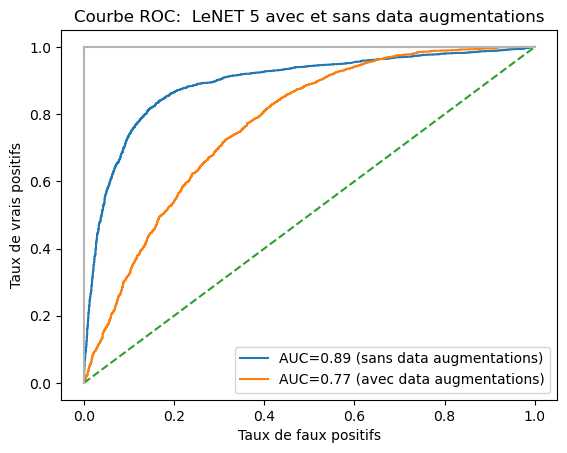

In [149]:
plt.title('Courbe ROC:  LeNET 5 avec et sans data augmentations')
plt.plot(FPR, TPR, label="AUC="+str(round(AUC,2))+" (sans data augmentations)")
plt.plot(FPR_augmente, TPR_augmente, label="AUC="+str(round(AUC_augmente,2))+" (avec data augmentations)")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Taux de vrais positifs')
plt.xlabel('Taux de faux positifs')
plt.legend(loc=4)
plt.show()

# Hyperparamétrisation du modèle: random search

https://pyimagesearch.com/2021/05/31/hyperparameter-tuning-for-deep-learning-with-scikit-learn-keras-and-tensorflow/

In [24]:
learnRate = [1e-2, 1e-3, 1e-4]
dropout = [0.2,0.3, 0.4, 0.5,0.6,0.7,0.8]
batchSize = [4, 8, 16, 32, 64, 128, 256]
epochs = [10, 20, 30, 40,50]

grid = dict(
	learnRate=learnRate,
	dropout=dropout,
	batch_size=batchSize,
	epochs=epochs
)

In [25]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

model = KerasClassifier(build_fn=buildModel, verbose=1)
#grid = GridSearchCV(estimator=model, param_grid=hyperMatrix)

#n_iter: nombre de modèles entrainés
searcher = RandomizedSearchCV(estimator=model, cv=5, n_iter= 10, param_distributions=grid, scoring='recall')
searchResults = searcher.fit(X_train_permute.numpy(), Y_train.numpy())

Epoch 1/50
73/73 [==============================] - 3s 33ms/step - loss: 0.6502 - Accuracy: 0.6212 - recall_m: 0.7229 - precision_m: 0.6228 - f1_m: 0.6672
Epoch 2/50
73/73 [==============================] - 2s 32ms/step - loss: 0.5907 - Accuracy: 0.6988 - recall_m: 0.8220 - precision_m: 0.6805 - f1_m: 0.7421
Epoch 3/50
73/73 [==============================] - 2s 32ms/step - loss: 0.5682 - Accuracy: 0.7148 - recall_m: 0.8143 - precision_m: 0.6955 - f1_m: 0.7489
Epoch 4/50
73/73 [==============================] - 2s 33ms/step - loss: 0.5510 - Accuracy: 0.7320 - recall_m: 0.7839 - precision_m: 0.7151 - f1_m: 0.7474
Epoch 5/50
73/73 [==============================] - 2s 33ms/step - loss: 0.5328 - Accuracy: 0.7461 - recall_m: 0.7955 - precision_m: 0.7475 - f1_m: 0.7703
Epoch 6/50
73/73 [==============================] - 2s 34ms/step - loss: 0.5153 - Accuracy: 0.7634 - recall_m: 0.8050 - precision_m: 0.7658 - f1_m: 0.7843
Epoch 7/50
73/73 [==============================] - 2s 33ms/step - los

In [26]:
# summarize grid search information
bestScore = searchResults.best_score_
bestParams = searchResults.best_params_
print("[INFO] best score is {} using {}".format(round(bestScore,3),
	bestParams))

[INFO] best score is 0.872 using {'learnRate': 0.01, 'epochs': 50, 'dropout': 0.7, 'batch_size': 64}


In [27]:
searchResults.cv_results_["mean_test_score"]

array([0.86672053, 0.84339232, 0.87248866, 0.85845504, 0.8550131 ,
       0.85556154, 0.81455413, 0.8255116 , 0.84269629, 0.85940796])

# Résultats sur le modèle optimisé

In [31]:
best_model=buildModel(learnRate=0.01, dropout=0.7)

best_model.fit(x=X_train_permute.numpy(), y=Y_train.numpy(),
	validation_data=(X_test_permute.numpy(), Y_test.numpy()),
	batch_size=64,
	epochs=50)

Epoch 1/50
361/361 [==============================] - 8s 19ms/step - loss: 0.5635 - Accuracy: 0.7179 - recall_m: 0.7927 - precision_m: 0.7129 - f1_m: 0.7473 - val_loss: 0.5185 - val_Accuracy: 0.7468 - val_recall_m: 0.7929 - val_precision_m: 0.7415 - val_f1_m: 0.7637
Epoch 2/50
361/361 [==============================] - 6s 17ms/step - loss: 0.4699 - Accuracy: 0.7949 - recall_m: 0.8309 - precision_m: 0.7905 - f1_m: 0.8081 - val_loss: 0.4711 - val_Accuracy: 0.7980 - val_recall_m: 0.8035 - val_precision_m: 0.8057 - val_f1_m: 0.8022
Epoch 3/50
361/361 [==============================] - 6s 16ms/step - loss: 0.4335 - Accuracy: 0.8221 - recall_m: 0.8453 - precision_m: 0.8243 - f1_m: 0.8325 - val_loss: 0.4232 - val_Accuracy: 0.8259 - val_recall_m: 0.8409 - val_precision_m: 0.8227 - val_f1_m: 0.8294
Epoch 4/50
361/361 [==============================] - 6s 17ms/step - loss: 0.4156 - Accuracy: 0.8323 - recall_m: 0.8510 - precision_m: 0.8344 - f1_m: 0.8404 - val_loss: 0.4253 - val_Accuracy: 0.8256 

In [32]:
loss, accuracy, recall, precision, f1score = best_model.evaluate(X_test_permute.numpy(), Y_test.numpy(), verbose=0)
print("Loss sur l'échantillon test: {}".format(round(loss,3)))
print("Accuracy sur l'échantillon test: {}".format(round(accuracy,3)))
print("Recall sur l'échantillon test: {}".format(round(recall,3)))
print("Precision sur l'échantillon test: {}".format(round(precision,3)))
print("F1-score sur l'échantillon test: {}".format(round(f1score,3)))

Loss sur l'échantillon test: 0.323
Accuracy sur l'échantillon test: 0.869
Recall sur l'échantillon test: 0.875
Precision sur l'échantillon test: 0.885
F1-score sur l'échantillon test: 0.876


In [33]:
best_predict = best_model.predict(X_test_permute.numpy())
best_y_pred = (np.squeeze(best_predict) > 0.5).astype("int32")

181/181 [==============================] - 1s 3ms/step


In [35]:
uni, compteur = np.unique(best_y_pred, return_counts=True)
res_best=dict(zip(uni, compteur))
print("Nombre d'images prédites avec panneaux: {}".format(res_best[1]))
print("Nombre d'images prédites sans panneau: {}".format(res_best[0]))

Nombre d'images prédites avec panneaux: 3081
Nombre d'images prédites sans panneau: 2681


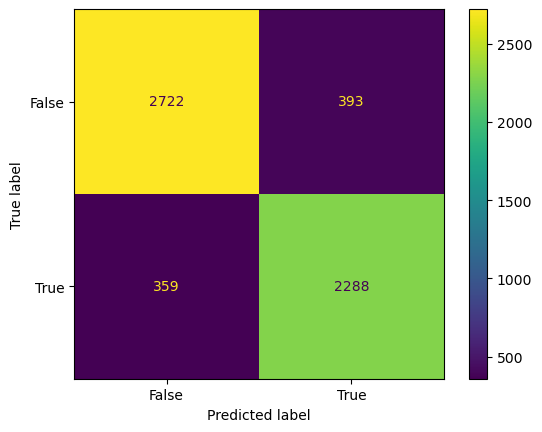

In [36]:
r = confusion_matrix(Y_test, best_y_pred)
r = np.flip(r)

cm_display = ConfusionMatrixDisplay(confusion_matrix = r, display_labels = [False, True])
cm_display.plot()
plt.show()

In [37]:
FPR, TPR, thresholds_keras = roc_curve(Y_test.numpy(), best_predict)
AUC = auc(FPR, TPR)
print("AUC: {}".format(round(AUC, 2)))

AUC: 0.93


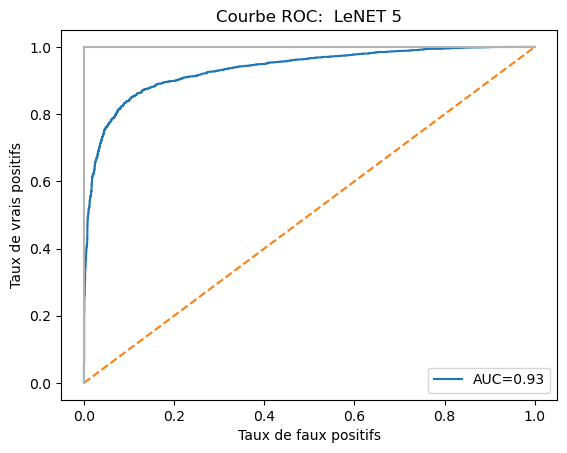

In [38]:
plt.title('Courbe ROC:  LeNET 5')
plt.plot(FPR, TPR, label="AUC="+str(round(AUC,2)))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Taux de vrais positifs')
plt.xlabel('Taux de faux positifs')
plt.legend(loc=4)
plt.show()